In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utilities import thresholds
from utilities import image_utility
from utilities import calibration
from  utilities import lane_finder

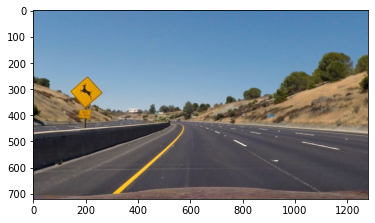

In [2]:
c = calibration.CameraCalibration()
c.load_calibration('././camera_cal/')
img = cv2.imread('test_images/test2.jpg')
undistort,mtx,dist =c.undistort_image(img)

warped = image_utility.warp_image(undistort,140,470,100)
combined_binary,s_binary = thresholds.highlight_features(warped,7,(50,150),(50,200),(0.5,np.pi/2),(80,200))
hist = image_utility.calculate_histogram(combined_binary)

In [5]:
# Color lanes
lanes = lane_finder.Lanes(combined_binary)
lanes.fit_polynomial()
res = lanes.out_image

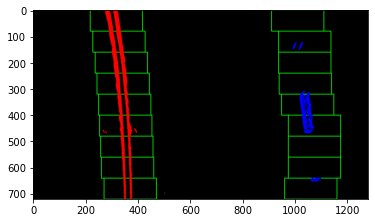

In [6]:
plt.imshow(res)

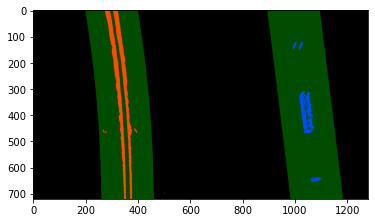

In [8]:
res= lanes.generate_plotting_values()
new_res = lanes.search_around_poly(combined_binary)
plt.imshow(new_res)